In [88]:
import numpy as np
from matplotlib import pyplot as plt 
import scipy
from scipy import signal

In [60]:
data = np.genfromtxt("data/resistances.csv", delimiter=" ", skip_header=1)
(dataNum,) = np.shape(data)
x = np.arange(0,dataNum) 
dataNum

(766,)

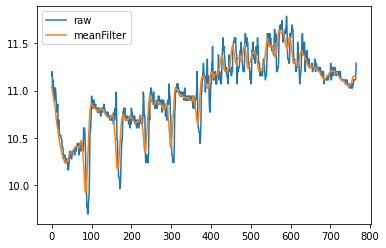

In [85]:
# apply mean filter
meanFilter = scipy.ndimage.filters.uniform_filter1d(data,11, origin=-5)
plt.plot(x, data, label="raw")
plt.plot(x, meanFilter, label="meanFilter")
plt.legend()
plt.show()

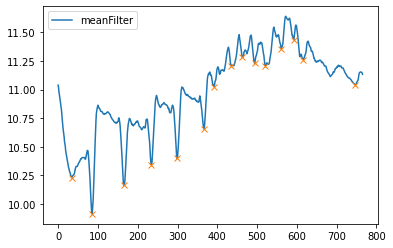

15

In [101]:
# find peaks with mean fitler
negativeData = -meanFilter
peaks, _ = scipy.signal.find_peaks(negativeData, prominence=0.1)
plt.plot(x, meanFilter, label="meanFilter")
plt.plot(peaks, meanFilter[peaks], "x")
plt.legend()
plt.show()
len(peaks)

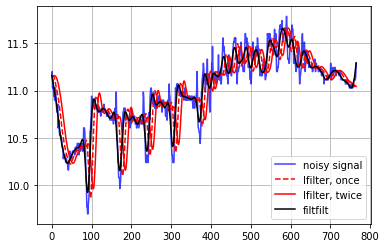

In [96]:
# apply low pass filter
b, a = signal.butter(3, 0.1)
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, data)
plt.figure
plt.plot(x, data, 'b', alpha=0.75)
plt.plot(x, z, 'r--', x, z2, 'r', x, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice',
            'filtfilt'), loc='best')
plt.grid(True)
plt.show()

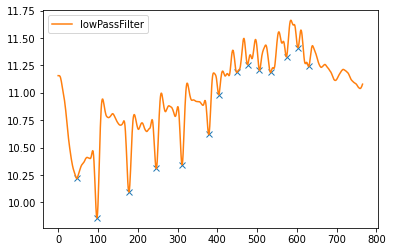

14

In [103]:
# find peaks with low pass filter
peaks, _ = scipy.signal.find_peaks(-z, prominence=0.15)
plt.plot(peaks, z[peaks], "x")
plt.plot(x, z, label="lowPassFilter")
plt.legend()
plt.show()
len(peaks)

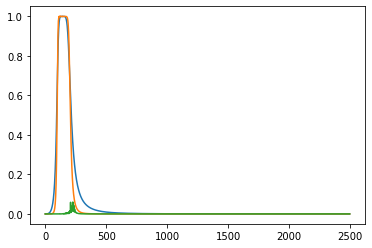

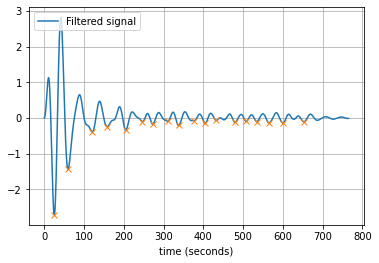

18

In [122]:
# apply band pass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

# Sample rate and desired cutoff frequencies (in Hz).
fs = 5000.0
lowcut = 100.0
highcut = 200.0

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = scipy.signal.freqz(b, a, worN=2000)
    plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
plt.show()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order=3)
# find peaks for band pass filter
peaks, _ = scipy.signal.find_peaks(-y, prominence=0.15)
plt.plot(x, y, label='Filtered signal')
plt.plot(peaks, y[peaks], "x")
plt.xlabel('time (seconds)')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

len(peaks)

766